##  Energy Star Score Prediction - Regression

######  Goal : Predict the Energy Star score of a building and find the factor influencing the score

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

In [3]:
data = pd.read_csv(r'C:\Users\mallikarjuna.m\Documents\Datascience\Projects June\Regression\Energy Star Score Prediction\data\raw_file.csv')

In [4]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [6]:
print("the dataset has number of rows {x} and columns {y}".format(x= data.shape[0] , y = data.shape[1]))

the dataset has number of rows 11746 and columns 60


In [7]:
obj = len(data.select_dtypes ('O').columns)
integer = len(data.select_dtypes ('int64').columns)
float_num = len(data.select_dtypes ('float64').columns)

print('number of obj {} , number of integers {} and number of floats are {}'.format(obj,integer,float_num))

number of obj 48 , number of integers 6 and number of floats are 6


Analysis:

* The data has 11746 rows and 60 features
* Most of the fetures are objects with 'non available'. Need to check does the features is made as object because of non available though it has numbers in it.

###  Data Cleaning and Formating

In [8]:
# replace all Not Available into NaN

data = data.replace('Not Available', np.nan)
obj_col = data.select_dtypes ('O').columns

'''convert the datatypes of features with 'ft²', 'therms', 'kBtu', 'Metric Tons CO2e', 
#'gal','kWh' ,'Score' from object to float ''' 

for i in obj_col:
    if ('ft²' in i or 'therms' in i or 'kBtu' in i or 'Metric Tons CO2e' in i or 'gal' in i or 
        'kWh' in i  or 'Score' in i) :
        data[i] = data[i].astype('float64')

In [9]:
obj = len(data.select_dtypes ('O').columns)
integer = len(data.select_dtypes ('int64').columns)
float_num = len(data.select_dtypes ('float64').columns)

print('number of obj {} , number of integers {} and number of floats are {}'.format(obj,integer,float_num))

number of obj 23 , number of integers 6 and number of floats are 31


In [10]:
# Missing data

missing_num = data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending = False)
missing_per = (missing_num / len(data))* 100
missing = pd.concat([missing_num, missing_per ], axis = 1)
missing = missing.rename(columns= {0: 'missing_num' , 1 : 'missing_per' })
missing.head()

,missing_num,missing_per
Fuel Oil #1 Use (kBtu),11737,99.923378
Diesel #2 Use (kBtu),11730,99.863783
Address 2,11539,98.237698
Fuel Oil #5 & 6 Use (kBtu),11152,94.942959
District Steam Use (kBtu),10810,92.031330


In [11]:
# Remove columns with more than 50% of data missing

mis_50_col = missing[missing_per > 50].index
data = data.drop(mis_50_col, axis=1)
data.shape

(11746, 49)

In [12]:
print('{} columns were removed as it has more than 50% of missing data'.format(len(mis_50_col)))

11 columns were removed as it has more than 50% of missing data


###  Exploratory Data Analaysis ( EDA)

##### Uni-variable plot

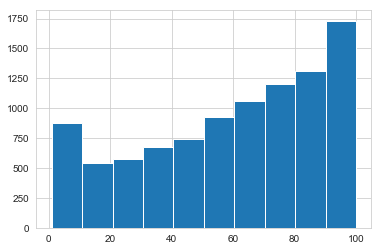

In [13]:
# Exploration of target variable - ENERGY STAR Score

data['ENERGY STAR Score'].hist()

As per data , the score should be uniformaly distibuted as it is a rank percentile from 1-100. But the data is not uniformaly distibuted. so we now check "Site EUI (kBtu/ft²" which is a important feature 

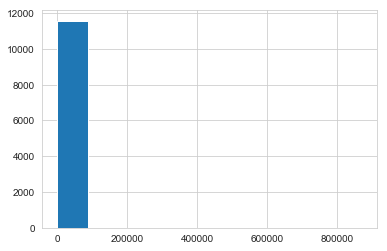

In [14]:
data['Site EUI (kBtu/ft²)'].hist()

In [15]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

Site EUI (kBtu/ft²)' has the average of 280 but there is max value of 869265 which is an extreme value. so should avoid such outliers from the data for normal distibution


In [16]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [17]:
#Remove outlier by removeing the records with less than -3*IQR and above +3*IQR

first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

IQR = third_quartile - first_quartile



In [18]:
third_quartile +3*IQR

205.0

In [19]:
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile -3*IQR)) & 
            (data['Site EUI (kBtu/ft²)'] <(third_quartile +3*IQR))]

Text(0.5, 1.0, 'Site EUI Distribution')

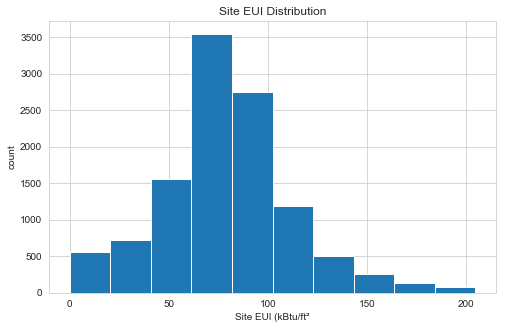

In [20]:
plt.figure(figsize = (8,5))

plt.hist(data['Site EUI (kBtu/ft²)'])
plt.xlabel('Site EUI (kBtu/ft²')
plt.ylabel('count')
plt.title('Site EUI Distribution')

Now the data is nearly normally distributed

##### Looking for Relationship

In [21]:
# Create a list of buildings with more than 100 measurements

prop_type = data['Largest Property Use Type'].value_counts()
prop_type = list(prop_type[prop_type > 100].index)

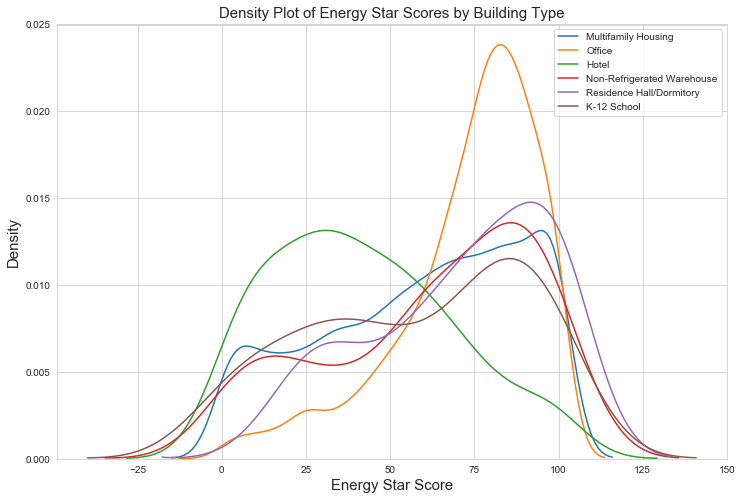

In [22]:
plt.figure(figsize = (12,8))
for i in prop_type:
    subset = data[data['Largest Property Use Type'] == i]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = i)
    plt.xlabel('Energy Star Score', size = 15)
    plt.ylabel('Density', size = 15)
    plt.title('Density Plot of Energy Star Scores by Building Type', size = 15)

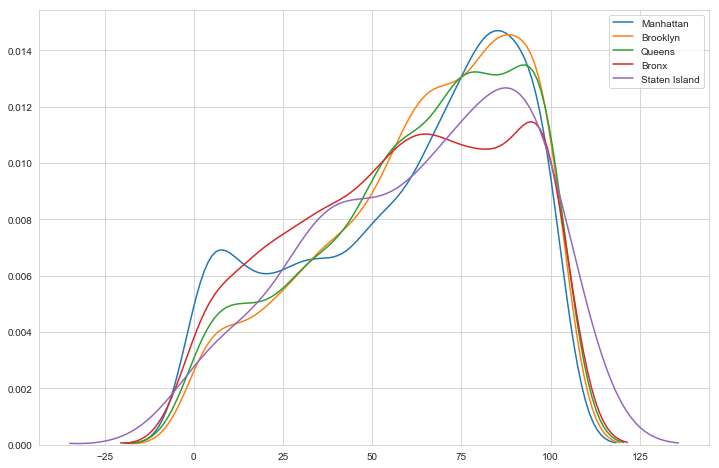

In [23]:
# Create a list of boroughs with more than 100 observations
plt.figure(figsize = (12,8))
boroughs = data['Borough'].value_counts()
boroughs = boroughs[boroughs>100].index

for i in boroughs:
    subset = data[data['Borough'] == i]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = i)

From the above graph shows that "Largest Property Use Type"has some significant effect on "ENERGY STAR Score" but "Borough" donot have the significant effect

#### Correlations between Features and Target

In [24]:
data.corr()['ENERGY STAR Score'].sort_values(ascending = True).head()

Site EUI (kBtu/ft²)                                       -0.723864
Weather Normalized Site EUI (kBtu/ft²)                    -0.713993
Weather Normalized Source EUI (kBtu/ft²)                  -0.645542
Source EUI (kBtu/ft²)                                     -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.358394
Name: ENERGY STAR Score, dtype: float64

In [25]:
# Log & Sqrt transformation of numerical columns

num_col = data.select_dtypes('number')

for i in num_col.columns:
    if i == 'ENERGY STAR Score':
        next
    else:
        num_col['Sqrt_'+i] = np.sqrt(num_col[i])
        num_col['Log_'+i] = np.log(num_col[i])

In [26]:
# One hot encodeing of Largest Property Use Type and Borough
cat_col = data[['Largest Property Use Type', 'Borough']]

cat_col = pd.get_dummies(cat_col)

In [27]:
# Combine both transformed numerical and categorical features

features = pd.concat([num_col,cat_col], axis = 1)
features = features.dropna(subset = ['ENERGY STAR Score'])
features.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Sqrt_Order,...,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN,3.872983,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN,4.582576,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0,4.690416,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0,4.795832,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21,24,2806486,NaN,189766.0,1911,2,100,100.0,68.0,NaN,6.1,0.5,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766,NaN,NaN,115.6,NaN,NaN,NaN,NaN,NaN,4.898979,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
#Find correlations with the score

features.corr()['ENERGY STAR Score'].dropna().sort_values()

Site EUI (kBtu/ft²)                                               -0.723864
Weather Normalized Site EUI (kBtu/ft²)                            -0.713993
Sqrt_Site EUI (kBtu/ft²)                                          -0.699817
Sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.689019
Sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.671044
Sqrt_Source EUI (kBtu/ft²)                                        -0.669396
Weather Normalized Source EUI (kBtu/ft²)                          -0.645542
Source EUI (kBtu/ft²)                                             -0.641037
Log_Source EUI (kBtu/ft²)                                         -0.622892
Log_Weather Normalized Source EUI (kBtu/ft²)                      -0.620329
Log_Site EUI (kBtu/ft²)                                           -0.612039
Log_Weather Normalized Site EUI (kBtu/ft²)                        -0.601332
Log_Weather Normalized Site Electricity Intensity (kWh/ft²)       -0.424246
Sqrt_Weather

**Analysis**:
* The log and square root transformations do not show strong relationship with score.
* Even the categorical columns doesn't show strong relationship with score.
* *Largest Property Use Type_Office* has shown a sight +ve correlation.

In [29]:
len(data['Largest Property Use Type'])

11319

In [30]:
len(data.dropna(subset=['ENERGY STAR Score'])['Largest Property Use Type'])

9461

#### Two-Variable Plots

In [31]:
# Find most used property types( i.e with count more than 100)
features['Largest Property Use Type'] = data.dropna(subset=['ENERGY STAR Score'])['Largest Property Use Type']

prop_type = features['Largest Property Use Type'].value_counts()
prop_type = list(prop_type[prop_type > 100].index)
prop_type

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

In [32]:
# select the data of only that features

features = features[features['Largest Property Use Type'].isin(prop_type)]
features.shape

(8979, 139)

<Figure size 1440x576 with 0 Axes>

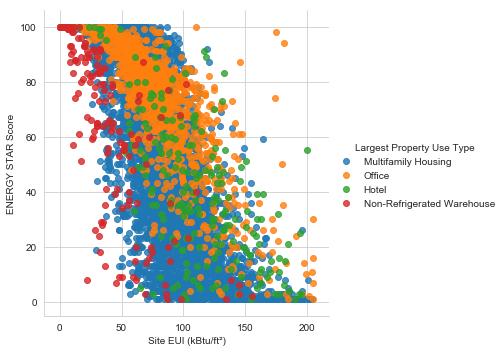

In [33]:
# Energy Star Score vs Site EUI
plt.figure(figsize = (20,8))
sns.lmplot(x = 'Site EUI (kBtu/ft²)', y='ENERGY STAR Score', data = features , hue= 'Largest Property Use Type', fit_reg = False)

**Analysis** :
* 'Multifamily Housing' has gradual decrease of rating with increase in size of building.
* Most of the Office has high score with less space.
* Score & Size of building has similar relationship like that of housing but 'Office' & 'Hotel' has more space and 
  'Non-Refrigerated Warehouse' has less space on compared with Housing 



#### Pairplot

In [34]:
plot_data = features[['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'Log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({-np.inf : np.nan, -np.inf : np.nan})
plot_data = plot_data.dropna()

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'Log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

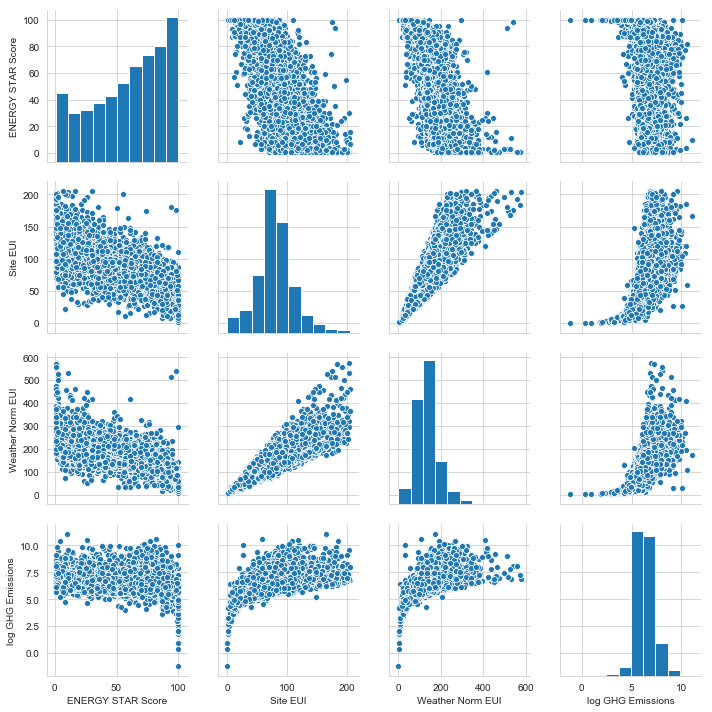

In [35]:
sns.pairplot(plot_data)

In [36]:
plot_data.corr()['ENERGY STAR Score']

ENERGY STAR Score    1.000000
Site EUI            -0.735898
Weather Norm EUI    -0.666895
log GHG Emissions   -0.345201
Name: ENERGY STAR Score, dtype: float64

#### Feature Engineering and Selection¶

In [37]:
features = data.copy()

num_col = features.select_dtypes('number')

for i in num_col.columns:
    if i  == 'ENERGY STAR Score':
        next
    else:
        num_col['Log_'+i] = np.log(num_col[i])
        
cat_col = data[['Largest Property Use Type', 'Borough']]
cat_col = pd.get_dummies(cat_col)

features = pd.concat([num_col,cat_col], axis = 1)


In [38]:
features.shape

(11319, 110)

#### Remove multi-collliner Features

In [39]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'Log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['ENERGY STAR Score'] = y
               
    return x

In [40]:
features = remove_collinear_features(features, 0.60)
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

#### Split Into Training and Testing Sets

In [41]:
# Seperate the data with & without ENERGY STAR Score values

no_score = features[features['ENERGY STAR Score'].isnull()]
score = features[features['ENERGY STAR Score'].notnull()]
print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [42]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(score['ENERGY STAR Score'])
X = score.drop('ENERGY STAR Score', axis = 1)

In [43]:
X = X.replace({-np.inf : np.nan , np.inf : np.nan})

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


#### Establish a Baseline

Baseline - the model developed should meet the following Baseline accuracy. And the baseline accuracy is "median of train target" 

In [46]:
np.median(y_train)

66.0

In [47]:
np.mean(y_test) - np.median(y_train)

ENERGY STAR Score   -4.617119
dtype: float64

In [48]:
def mae(y_act, y_pred):
    return np.mean(abs(y_act - y_pred))

In [49]:
baseline_guess = np.median(y_train)
mae(y_test,baseline_guess)

ENERGY STAR Score    24.516379
dtype: float64

In [50]:
print('The baseline_guess is %0.2f'%baseline_guess)
print('The baseline performace is %0.4f'%mae(y_test,baseline_guess))

The baseline_guess is 66.00
The baseline performace is 24.5164


**Analysis**:
* The Emergy score is between 1 -100
* And the Mean absolute Error is 24.5 i.e 25
* So the ML model developed should be less than Baseline Error of 25

####  Data Pre-processing

##### Imputing the Missing values

In [51]:
from sklearn.preprocessing import Imputer, MinMaxScaler

imputer = Imputer(strategy = 'median')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [52]:
print(' Missing values in X_train is {}'.format(np.sum(np.isnan(X_train))))
print(' Missing values in X_test is {}'.format(np.sum(np.isnan(X_test))))

 Missing values in X_train is 0
 Missing values in X_test is 0


In [53]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


#### Scaling Features

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Reshape y to array and 1d vector
y_train = np.array(y_train).reshape(-1,)
y_test = np.array(y_test).reshape(-1,)

####  Machine Learning Models

**List of Machine Learning - Regression Models to apply**

* Linear Regression
* SVR
* Random Forest Regression
* Gradiant Boosting
* K-Nearest Neighbors Regression

##### Programs of application of ML models

In [56]:
def mae(y_test,y_pred):
    return np.mean(abs(y_test - y_pred ))

def fit_and_evaluate(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_mae = mae(y_test,y_pred)
    return model_mae

In [57]:
# Applicaiton of Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print('MAE of Linear Regression is %0.4f'%lr_mae)

MAE of Linear Regression is 13.4651


In [58]:
# Applicaiton of SVR

from sklearn.svm import SVR
svr = SVR(C=1000, gamma=0.1)

svr_mae = fit_and_evaluate(svr)
print('MAE of SVR is %0.4f'%svr_mae)

MAE of SVR is 10.9337


In [59]:
# Applicaiton of Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=60)

rf_mae = fit_and_evaluate(rf)
print('MAE of Random Forest Regression is %0.4f'%rf_mae)

MAE of Random Forest Regression is 10.0273


In [60]:
# Applicaiton of Gradiant Boosting

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=60)

gb_mae = fit_and_evaluate(gb)
print('MAE of Gradiant Boosting is %0.4f'%gb_mae)

MAE of Gradiant Boosting is 10.0117


In [61]:
# Applicaiton of K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)
knr_mae = fit_and_evaluate(knr)
print('MAE of K-Nearest Neighbors Regression is %0.4f'%knr_mae)

MAE of K-Nearest Neighbors Regression is 12.6973


In [62]:
ml_df = pd.DataFrame({'Model' : ['Linear Regression', 'SVR', 'Random Forest', 'Gradiant Boosting', 'KNN Regression'], 
                      'Values' : [lr_mae, svr_mae, rf_mae, gb_mae, knr_mae ]})

In [63]:
ml_df = ml_df.sort_values('Values', ascending = True)
ml_df

,Model,Values
3,Gradiant Boosting,10.011677
2,Random Forest,10.027334
1,SVR,10.933730
4,KNN Regression,12.697253
0,Linear Regression,13.465093


Text(0.5, 1.0, 'Comparision of different Models')

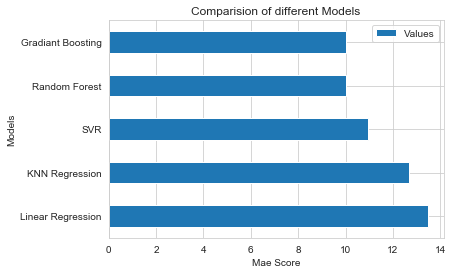

In [64]:
ml_df.sort_values('Values', ascending = False).plot(x= 'Model', y = 'Values', kind = 'barh' )
plt.xlabel('Mae Score')
plt.ylabel('Models')
plt.title('Comparision of different Models')

So, from the above ML models Gradiant Boosting showed the best MAE score of 10.011. So we will further go-ahead with Paramaeter tuning and cross-validation for the accuracy

#### Model Optimization

In [65]:
# Hyperparameter Tuning


GradientBoostingRegressor()

# Loss Function
loss = ['ls', 'lad', 'huber', 'quantile']

# n_estimators is number of trees
n_estimators = [100, 500, 900, 1100, 1500]

# min_samples_split is min number of samples for a split
min_samples_split = [2,4,6,10]

#min_samples_leaf is min numb of leafs for a split
min_samples_leaf = [1,2,4,6,8]

#max_depth is max depth of the tree
max_depth = [2,3,5,10,15]

#max_features is max number of features in a split
max_features = ['auto', 'sqrt', 'log2']


hyperparameter_grid = { 'loss' : loss, 'n_estimators' : n_estimators, 'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf, 'max_depth':max_depth, 'max_features': max_features}


In [66]:
hyperparameter_grid

{'loss': ['ls', 'lad', 'huber', 'quantile'],
 'n_estimators': [100, 500, 900, 1100, 1500],
 'min_samples_split': [2, 4, 6, 10],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'max_depth': [2, 3, 5, 10, 15],
 'max_features': ['auto', 'sqrt', 'log2']}

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [68]:
# Use Grid Search to further narrow down the parameters 

trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [69]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [70]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,5.405187,0.025769,0.011718,0.006765,100,{'n_estimators': 100},-9.059147,-8.929849,-9.402637,-9.165585,-9.139261,0.173440,15,-7.918137,-7.864550,-7.836847,-7.857162,-7.869174,0.030034
1,8.382748,0.116114,0.018645,0.007421,150,{'n_estimators': 150},-8.986413,-8.865882,-9.347857,-9.138821,-9.084695,0.180082,14,-7.654401,-7.603127,-7.591472,-7.589267,-7.609567,0.026415
2,9.457867,0.181860,0.018235,0.004522,200,{'n_estimators': 200},-8.941572,-8.829059,-9.312729,-9.091138,-9.043577,0.181054,13,-7.504308,-7.366527,-7.405810,-7.382212,-7.414714,0.053584
3,11.446927,0.302421,0.021631,0.006528,250,{'n_estimators': 250},-8.931634,-8.820466,-9.307766,-9.078072,-9.034437,0.182317,12,-7.391415,-7.248355,-7.278189,-7.239040,-7.289250,0.060732
4,13.953999,0.414129,0.029272,0.002950,300,{'n_estimators': 300},-8.911990,-8.802072,-9.313354,-9.068196,-9.023852,0.192009,11,-7.285113,-7.125781,-7.201679,-7.125255,-7.184457,0.065909


Text(0.5, 1.0, 'Performance vs Number of Trees')

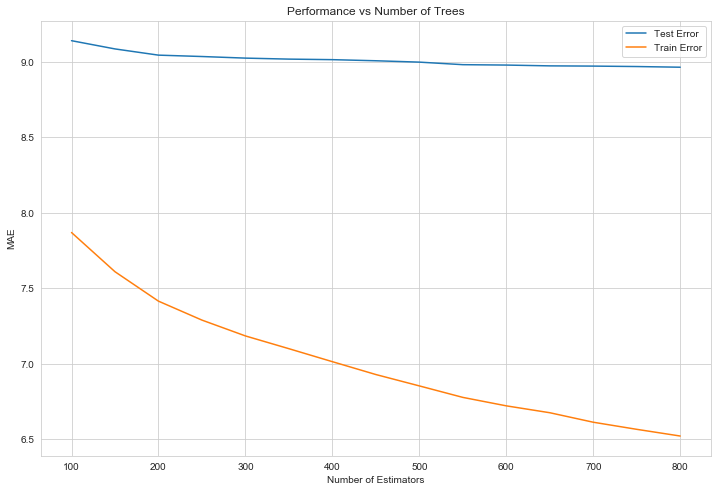

In [71]:
plt.figure(figsize=(12,8))
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Test Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Train Error')
plt.xlabel('Number of Estimators')
plt.ylabel('MAE')
plt.legend()
plt.title('Performance vs Number of Trees')

**Analysis**:
* MAE of Train has sharpe decrease in Mean obsolute error with increase in Trees
* But the MAE of Test has no much decrease in Mean obsolute error with increase in Trees
* So model is learning the traininig data well but couldn't able to generalize well on test data. - So this is **overfitting**

#### Evaluate Final Model on the Test Set

In [72]:
# Apply and compare both the default model and best model

default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_

In [73]:
%%timeit -n 1 -r 5
default_model.fit(X_train,y_train)

1.03 s ± 68.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [74]:
%%timeit -n 1 -r 5
final_model.fit(X_train,y_train)

13.7 s ± 140 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [75]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [76]:
print('The MAE of default model on test data is {}'.format(mae(y_test,default_pred)))
print('The MAE of final model on test data is {}'.format(mae(y_test,final_pred)))

The MAE of default model on test data is 10.011256876115075
The MAE of final model on test data is 9.077025468063546


**The final model of Gradient Boosting with hyperparameter Tuning has performed well than default GB. And the final model mae is 9.07**

Text(0.5, 1.0, 'Distribution of Residuals')

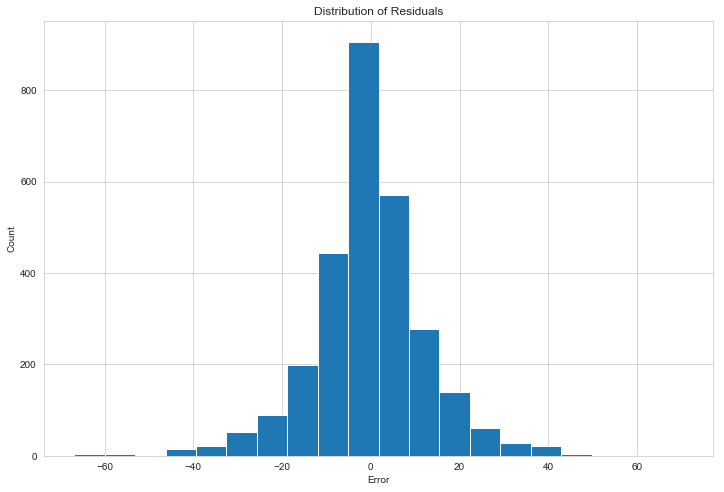

In [77]:
# Check distribution of residual of final model 
plt.figure(figsize=(12,8))
residual = final_pred - y_test
plt.hist(residual, bins=20)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

**Analysis**:
* The Residuals were highly normally distributed
* Some Ouliers at the low end . This indicate the model estimate error was far below that of the true value

#### Feature Importance

In [78]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X.columns), 
                                'importance': final_model.feature_importances_})

In [79]:
feature_results = feature_results.sort_values('importance', ascending = False)

Text(0.5, 1.0, 'Feature Importance')

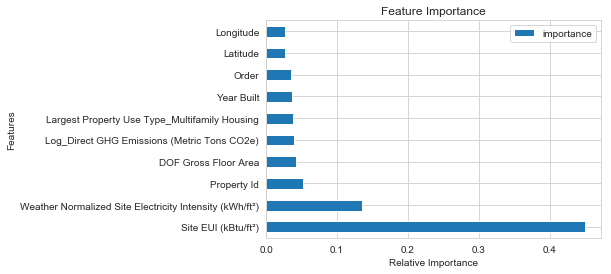

In [80]:
feature_results[:10].plot(x = 'feature', y = 'importance', kind = 'barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

**Analysis**:
* Site EUI & Wheather Normalized Site Electricity Intensity has got more importance in prediction and others have very less role

In [81]:
imp_features = list(feature_results['feature'][:10].values)
imp_features

['Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Property Id',
 'DOF Gross Floor Area',
 'Log_Direct GHG Emissions (Metric Tons CO2e)',
 'Largest Property Use Type_Multifamily Housing',
 'Year Built',
 'Order',
 'Latitude',
 'Longitude']

In [82]:
# Extract the names of the most important features and their indices
most_important_features = feature_results['feature'][:10]
indices = [list(X.columns).index(x) for x in imp_features]
indices

[6, 7, 1, 2, 14, 33, 3, 0, 10, 11]

In [87]:
# Keep only the most important features wrt indices
X_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [88]:
# Application of All features and Reduced feeatures to Linear regression and comapre results

lr = LinearRegression()

# Fit on full set of features
lr.fit(X_train, y_train)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y_train)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4651.
Linear Regression Reduced Results: MAE = 14.9719.


**The model with only Important features showed more Mean Absolute Error than the complete features model. So only the important features did not improve the linear regression results even the low important features contribute in improving model**

In [90]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)


print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))


Gradient Boosted Reduced Results: MAE = 9.6809


**The MAE of radient Boosting with hyperparameters is 9.07 but the Gradient Boosted Reduced Results is 9.68. So same like linear regression, reduced features dont help much in accurate prediction, all the features contribute to predict the better model**

#### Conclusion

* **With the provided data, machine learning model can predict the Energy Star Score of a building to within 10 points.**
* **Electricity Use Intensity is an important paramater for determining the Energy Star Score**